ADMN5015 - Assignment 3 - Marketing Sentimental Analysis

Elvis Mauricio Ramirez

Business Analytics, St Lawrence College - Kingston

ADMN5015 - Artificial Intelligence in Marketing

Professor: Raheleh Barkhordari

Oct, 2023

In [3]:
from google.colab import files
uploaded = files.upload()



Saving rawdata.csv to rawdata.csv


# Import libraries

In [4]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

# Import libraries
import tweepy
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

%matplotlib inline

# Description

The dataset contains information about:

Tweets: original text of the tweet.

Retweets: number of retweets of the current tweet.

Likes: number of likes of the current tweet.

Date: date of creation of the tweet.

Cleaned_tweets: text of the tweet after removing 'RT', hashtags, hyperlinks, mentions, emojis, leading and trailing whitespaces.

In [5]:
tweets_DF = pd.read_csv('rawdata.csv')

In [6]:
tweets_DF

,Tweets,Retweets,Likes,Date
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32
...,...,...,...,...
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27


# Data cleaning
## Text cleaning

In [7]:
# function to clean the tweets

def cleantwt (twt):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

  twt = re.sub('RT', '', twt) # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt) # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt) # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt) # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt) # remove leading and trailing whitespaces
  twt = re.sub(emoj, '', twt) # remove emojis
  return twt

In [8]:
# new column with the cleaned tweets

tweets_DF['Cleaned_Tweets'] = tweets_DF['Tweets'].apply(cleantwt)

In [9]:
# show dataframe
tweets_DF.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!


Some of the tweets only contained mentions or emojis, so when I applied the cleanup to the dataframe, some rows were left with empty strings in the 'Cleaned_tweets' column. Now, I'm going to delete them.

In [10]:
# Drop rows with empty strings ('')

tweets_DF.drop(tweets_DF[tweets_DF['Cleaned_Tweets'] == ''].index, inplace = True)

In [11]:
# Show dataframe with clean tweets column
tweets_DF.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!


## Removing duplicates

In [12]:
# Counting duplicate data in dataframe

tweets_DF.duplicated().sum()

0

There are no duplicates in the dataframe, so I can start with the analysis.

In [13]:
tweets_DF.to_csv('cleandata.csv', index = False)

In [14]:
shape = tweets_DF.shape

print(f"There are {shape[0]} tweets after the cleanup.")

There are 2668 tweets after the cleanup.


# Sentimental Analysis
A very accurate definition of polarity and subjectivity in sentiment analysis is the following, provided by Christian Meyer

-  Polarity refers to the strength of an opinion. It could be positive or negative. If something has a strong positive feeling or emotion associated with it, such as admiration, trust, love; this will indeed have a certain orientation towards all other aspects of that object’s existence. The same goes for negative polarities. A good example would be the following: ‘I don’t think I’ll buy this item because my previous experience with a similar item wasn’t so good.’ That will have a negative polarity.

- Subjectivity refers to the degree to which a person is personally involved in an object. What matters the most here are personal connections and individual experiences with that object, which may or may not differ from someone else’s point of view. For example: ‘I’m very happy with my new smartphone because it has the highest performance available on the market.’ Similarly to polarity, strong subjectivity may be negative or positive. The statement here is clearly subjective because the user is actually talking about his experience and how he feels about an object.

Having clarified this, I will start the analysis by calculating the polarity and subjectivity of each tweet in the dataframe.

## Getting subjectivity and polarity

In [15]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

In [16]:
#Create two new columns to save the results of the created functions
tweets_DF['Subjectivity'] = tweets_DF['Cleaned_Tweets'].apply(getSubjectivity)
tweets_DF['Polarity'] = tweets_DF['Cleaned_Tweets'].apply(getPolarity)

In [17]:
#Show the data
tweets_DF.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets,Subjectivity,Polarity
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20,0.2000
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,0.90,0.2000
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,0.00,0.0000
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!,0.65,0.4375
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!,0.00,0.0000


In [18]:
# Creating a function to classify or label the sentiments as negative, positive and neutral
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

In [19]:
# Create a new column 'Sentiment'
tweets_DF['Sentiment'] = tweets_DF['Polarity'].apply(getSentiment)

In [20]:
#show data
tweets_DF.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20,0.2000,Positive
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,0.90,0.2000,Positive
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,0.00,0.0000,Neutral
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!,0.65,0.4375,Positive
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!,0.00,0.0000,Neutral


# Visualizing the results

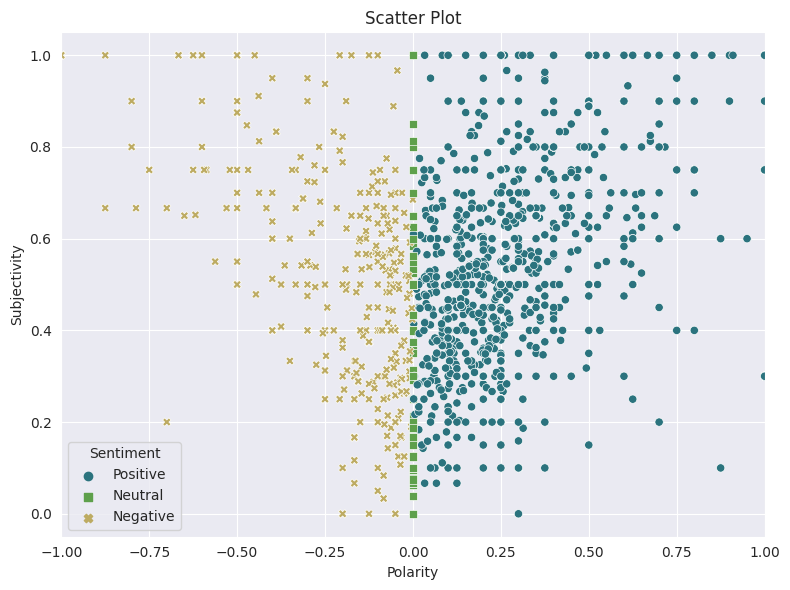

In [21]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (8,6))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=tweets_DF, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

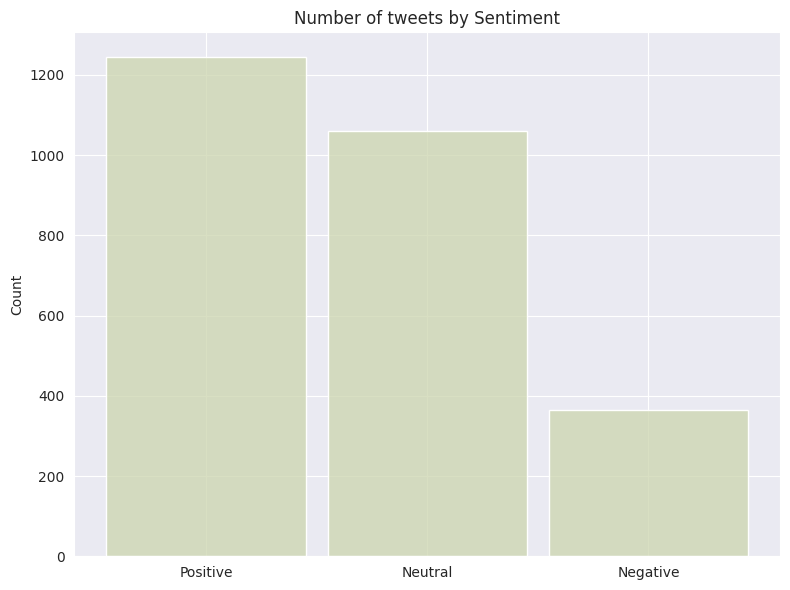

In [22]:
# Create a bar chart to count tweets according to its sentiment value

plt.figure(figsize = (8,6))

sns.histplot(tweets_DF, x = 'Sentiment', color = '#ccd5ae', shrink = 0.9).set(xlabel = None)
plt.title('Number of tweets by Sentiment')

plt.tight_layout()

### According to the data, most of Elon Musk's tweets are highly subjective and are perceived as positive or neutral.

In [23]:
# Creating month and year columns for time analysis
tweets_DF['Month'] = pd.DatetimeIndex(tweets_DF['Date']).month

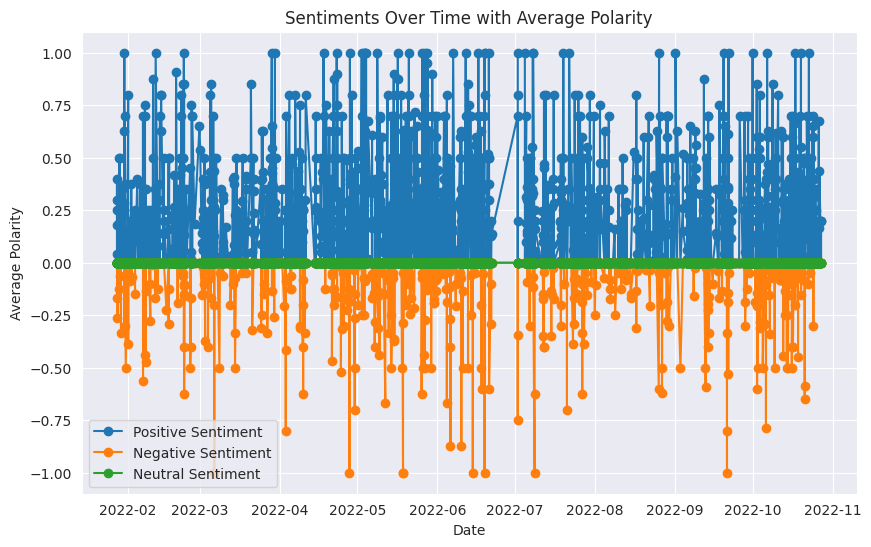

In [26]:

tweets_DF['Date'] = pd.to_datetime(tweets_DF['Date'])
sentiments_polarity_over_time = tweets_DF.groupby(['Date', 'Sentiment'])['Polarity'].mean().unstack(fill_value=0)

# set the plt
plt.figure(figsize=(10, 6))
plt.plot(sentiments_polarity_over_time.index, sentiments_polarity_over_time['Positive'], label='Positive Sentiment', marker='o')
plt.plot(sentiments_polarity_over_time.index, sentiments_polarity_over_time['Negative'], label='Negative Sentiment', marker='o')
plt.plot(sentiments_polarity_over_time.index, sentiments_polarity_over_time['Neutral'], label='Neutral Sentiment', marker='o')
plt.title('Sentiments Over Time with Average Polarity')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.legend()
plt.grid(True)

# show the plot
plt.show()

In [26]:
tweets_DF

,Tweets,Retweets,Likes,Date,Cleaned_Tweets,Subjectivity,Polarity,Sentiment,Month
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.200,0.2000,Positive,10
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,0.900,0.2000,Positive,10
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,0.000,0.0000,Neutral,10
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!,0.650,0.4375,Positive,10
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!,0.000,0.0000,Neutral,10
...,...,...,...,...,...,...,...,...,...
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06,Just that manganese is an alternative to iron ...,0.000,0.0000,Neutral,1
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20,Exactly,0.250,0.2500,Positive,1
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57,Your policies are directly responsible for the...,0.545,0.1800,Positive,1
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27,You should be voted out of office,0.000,0.0000,Neutral,1


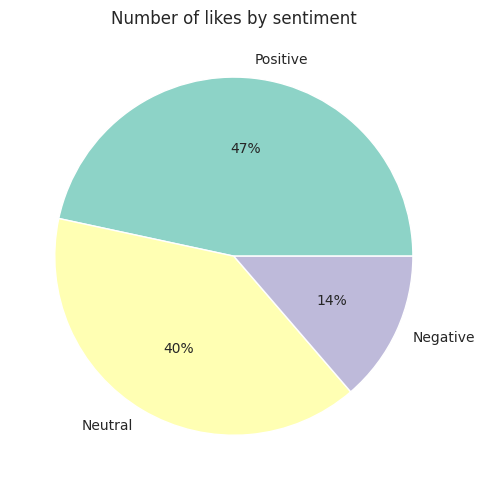

In [28]:
plt.figure(figsize = (10, 5))

data = tweets_DF['Sentiment'].value_counts()
colors = sns.color_palette('Set3')
labels = ['Positive', 'Neutral', 'Negative']

plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Number of likes by sentiment')

plt.tight_layout()

Apparently likes and retweets have a strong positive linear relationship. On the other hand, subjectivity and polarity have a slight positive relationship.

#Text Analysis - NLP
## Create a copy dataframe
Now, I am going to analyze which are the most mentioned words, people and organizations. To do this, I will create a new dataframe with the tweets column and I will clean and transform it again but following other steps, since in the previous cleanup mentions to people were eliminated.


In [29]:
# Create new dataframe 'tx' with Tweets column
tweets_txDF = tweets_DF[['Tweets']].copy()
tweets_txDF

,Tweets
0,@PeterSchiff 🤣 thanks
1,@ZubyMusic Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS
4,Meeting a lot of cool people at Twitter today!
5,Entering Twitter HQ – let that sink in! https:...
...,...
3055,@LimitingThe @baglino Just that manganese is a...
3056,@incentives101 @ICRicardoLara Exactly
3057,@ICRicardoLara Your policies are directly resp...
3058,@ICRicardoLara You should be voted out of office


In [31]:
# Reset index
tweets_txDF.reset_index(drop = True, inplace = True)

In [30]:
# Creating a function to clean the tweets (similar to cleantwt without cleaning the mentions)

def cleantext (text):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

  text = re.sub('https?:\/\/\S+', '', text) # remove the hyperlinks
  text = re.sub('^[\s]+|[\s]+$', '', text) # remove leading and trailing whitespaces
  text = re.sub(emoj, '', text) # remove emojis
  return text

In [31]:
# Create a new column with the cleaned text

tweets_txDF['Cleaned_Text'] = tweets_txDF['Tweets'].apply(cleantext)
tweets_txDF

,Tweets,Cleaned_Text
0,@PeterSchiff 🤣 thanks,@PeterSchiff thanks
1,@ZubyMusic Absolutely,@ZubyMusic Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,Dear Twitter Advertisers
4,Meeting a lot of cool people at Twitter today!,Meeting a lot of cool people at Twitter today!
5,Entering Twitter HQ – let that sink in! https:...,Entering Twitter HQ – let that sink in!
...,...,...
3055,@LimitingThe @baglino Just that manganese is a...,@LimitingThe @baglino Just that manganese is a...
3056,@incentives101 @ICRicardoLara Exactly,@incentives101 @ICRicardoLara Exactly
3057,@ICRicardoLara Your policies are directly resp...,@ICRicardoLara Your policies are directly resp...
3058,@ICRicardoLara You should be voted out of office,@ICRicardoLara You should be voted out of office


In [32]:
tweets_txDF = tweets_txDF['Cleaned_Text']

# Save all tweets in a list

all_tweets = []

for tweet in tweets_txDF:
  all_tweets.append(tweet)


# Split tweets in a list of words

lines = list()
for line in all_tweets:
  words = line.split()
  for w in words:
    lines.append(w)

In [36]:
# Print a sample
print(lines[0:10])

['@PeterSchiff', 'thanks', '@ZubyMusic', 'Absolutely', 'Dear', 'Twitter', 'Advertisers', 'Meeting', 'a', 'lot']


In [33]:
# Remove punctuation from the list
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

# Assign all words, except those containing empty string characters, to a new list
lines2 = []

for word in lines:
  if word != '':
    lines2.append(word)

In [38]:
# Print a sample
print(lines2[0:10])

['PeterSchiff', 'thanks', 'ZubyMusic', 'Absolutely', 'Dear', 'Twitter', 'Advertisers', 'Meeting', 'a', 'lot']


## Stemming and removing Stop Words
Now that I have removed the punctuations from the list, it remains to stem each word to its root.

Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form.

In [34]:
# Use SnowballStemmer to stem the words to their root
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language = 'english') # passing language parameter

stem = []
for word in lines2:
  stem.append(s_stemmer.stem(word))

In [40]:
print(stem[0:10])

['peterschiff', 'thank', 'zubymus', 'absolut', 'dear', 'twitter', 'advertis', 'meet', 'a', 'lot']


Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc.Since I have no interest on them, I'm going to delete them.

In [35]:
# Removing stop words with nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


# Remove all stop words

stem2 = []

for word in stem:
  if word not in stopwords.words():
    stem2.append(word)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
# Print sample
print(stem2[0:10])

['peterschiff', 'zubymus', 'absolut', 'dear', 'twitter', 'advertis', 'meet', 'lot', 'cool', 'peopl']


Create a dataframe from the list of words

In [37]:
tweets_txDF2 = pd.DataFrame(stem2)

In [38]:
tweets_txDF2.head(10)

,0
0,peterschiff
1,zubymus
2,absolut
3,dear
4,twitter
5,advertis
6,meet
7,lot
8,cool
9,peopl


# Creating visualizations
Top 20 words being used in tweets

Text(0.5, 0, 'Count of words')

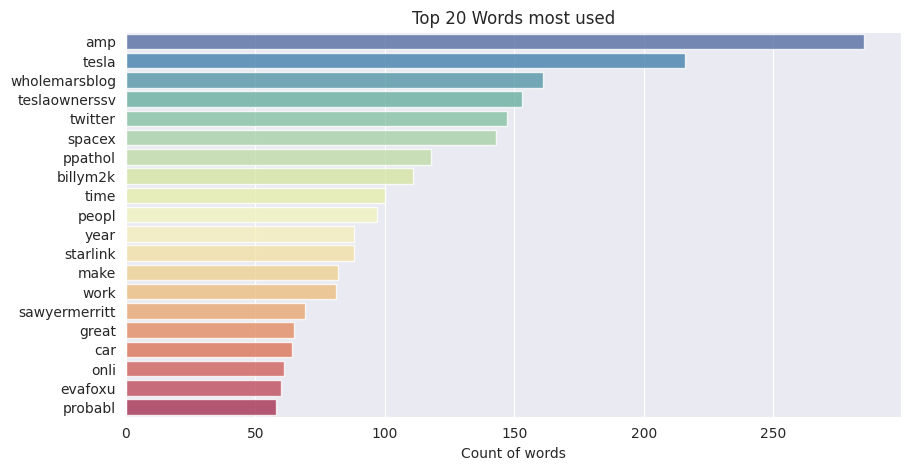

In [39]:
# Bar plot with top 20 words used

y = tweets_txDF2[0].value_counts()
y = y[:20]

plt.figure(figsize = (10,5))
sns.barplot(x=y.values, y=y.index, palette = 'Spectral_r', alpha = 0.8)
plt.title('Top 20 Words most used')
plt.xlabel('Count of words')

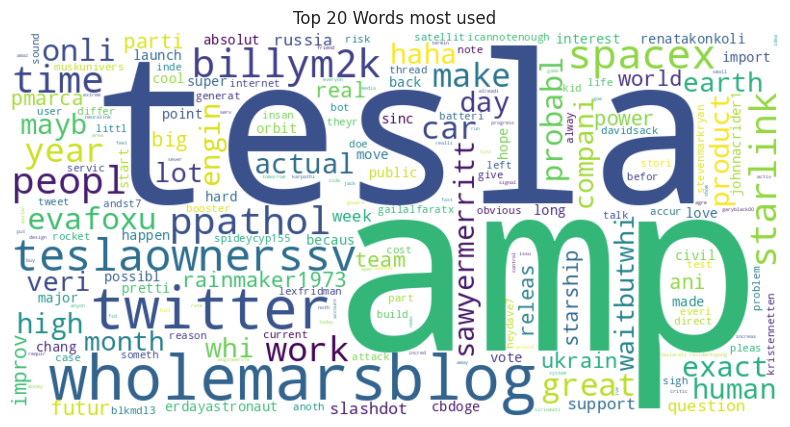

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the data
y = tweets_txDF2[0]

# Create a string of words
text = ' '.join(y)

# Configure the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Create the Word Cloud plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 Words most used')

# Show the Word Cloud plot
plt.show()

Top persons mentioned in tweets using spacy (NLP)

In [40]:
# Importing spacy for entity recognition on text data
import spacy
from spacy import displacy

In [41]:
# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

In [42]:
# Convert list into a string
string = ' '
text = string.join(lines2) # using lines2 instead of stem2 because it contains words unprocessed (more clear to the model)

# Converting text into a doc
doc = nlp(text)

# Creating a loop to store entity and label into lists
words = []
labels = []

for ent in doc.ents:
  words.append(ent.text)
  labels.append(ent.label_)

# Save info into a new dataframe
tx3 = pd.DataFrame({'Words':words,'Labels':labels})

In [43]:
# Show dataframe
tx3.head(10)

,Words,Labels
0,PeterSchiff,ORG
1,ZubyMusic Absolutely Dear,PRODUCT
2,today,DATE
3,Entering Twitter,PERSON
4,Twitter,NORP
5,1000,CARDINAL
6,Twitter,PERSON
7,The New York Times,ORG
8,PPathole Twitter,PERSON
9,30,CARDINAL


The model has categorized the entities quite well. It is important to remember that no model is perfect so it is possible that some errors may appear.

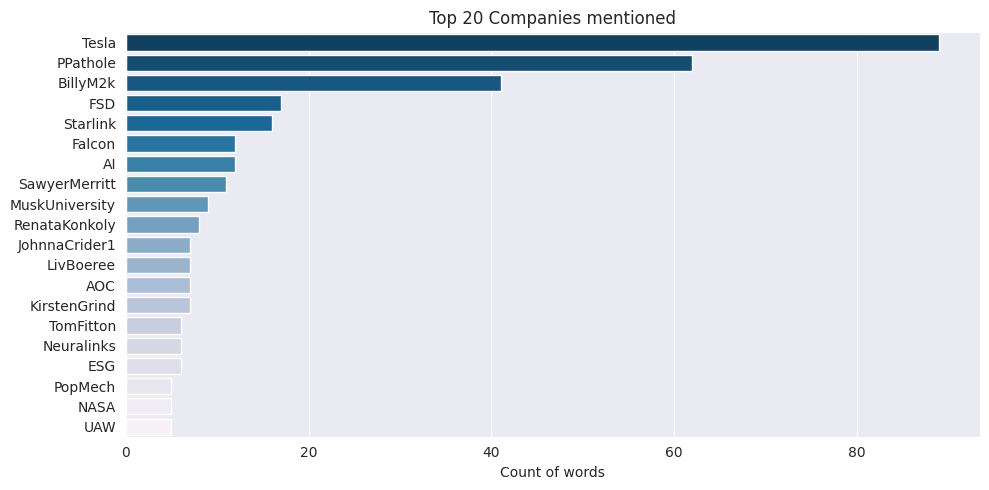

In [44]:
# Plotting companies most mentioned in tweets

y = tx3[tx3['Labels'] == 'ORG']['Words'].value_counts()
y = y[:20]

plt.figure(figsize = (10,5))
sns.barplot(x=y.values, y=y.index, palette='PuBu_r')
plt.title('Top 20 Companies mentioned')
plt.xlabel('Count of words')

plt.tight_layout()

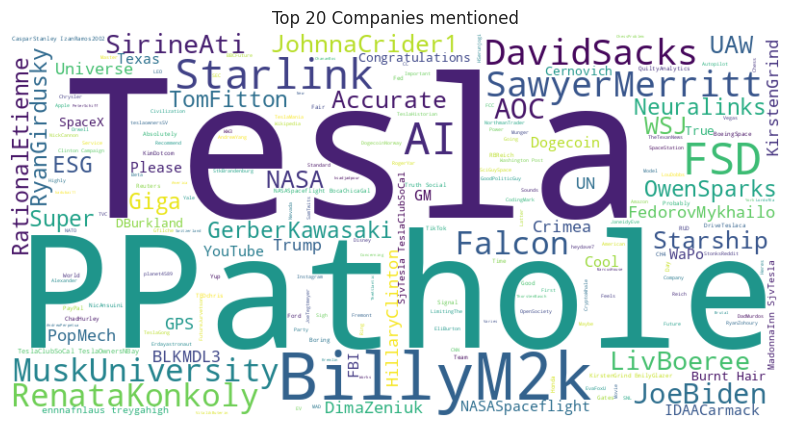

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the data
y = tx3[tx3['Labels'] == 'ORG']['Words']

# Create a string of words
text = ' '.join(y)

# Configure the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Create the Word Cloud plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 Companies mentioned')

# Show the Word Cloud plot
plt.show()

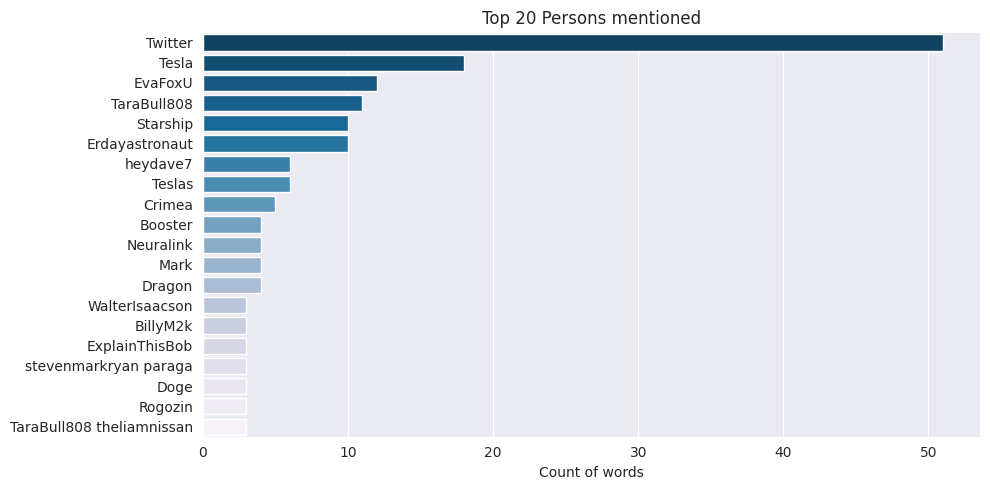

In [45]:
# Plotting persons most mentioned in tweets

y = tx3[tx3['Labels'] == 'PERSON']['Words'].value_counts()
y = y[:20]

plt.figure(figsize=(10, 5))
sns.barplot(x=y.values, y=y.index, palette='PuBu_r')
plt.title('Top 20 Persons mentioned')
plt.xlabel('Count of words')

plt.tight_layout()

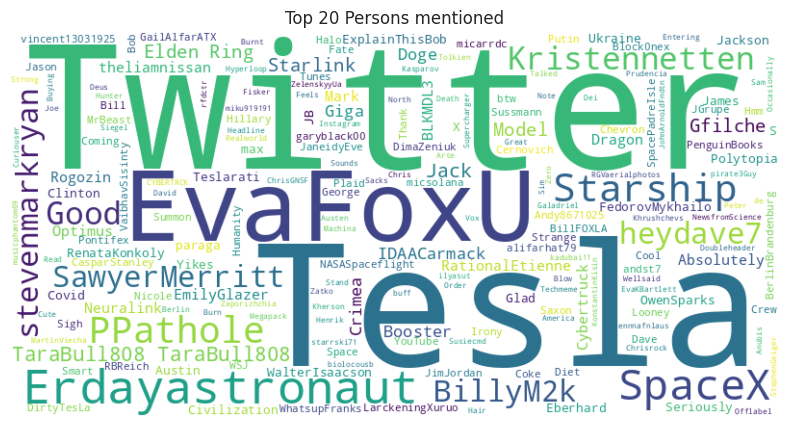

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


y = tx3[tx3['Labels'] == 'PERSON']['Words']


text = ' '.join(y)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 Persons mentioned')

# Muestra el gráfico de nube de palabras
plt.show()